In [81]:
# ===============================
# 🔹 Importación de librerías
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ===============================
# 🔹 Carga de datos
# ===============================
print("Ruta de ejecución actual:", os.getcwd())

df = pd.read_csv('../../Base_de_datos.csv')

# ===============================
# 🔹 Exploración inicial
# ===============================
print("Dimensiones iniciales:", df.shape)
df.info()
df.head()


Ruta de ejecución actual: c:\Users\uinformatica8.GIGHA\OneDrive - GIGHA SAS - JIRO SAS\Documentos\Tomas\machine-learning\mlops_pipeline\src
Dimensiones iniciales: (2000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [82]:
# ===============================
# 🔹 Separar variable objetivo y eliminar columnas no predictivas
# ===============================
target_name = 'loan_approved'
cols_no_predictivas = ['name', 'city', 'points']  # columnas informativas o de alto cardinalidad

# Guardar SOLO la variable objetivo como DataFrame (para exportar correctamente)
y = df[[target_name]].copy()

# Eliminar target y columnas no predictivas del dataset de features
df_features = df.drop(columns=[target_name] + cols_no_predictivas).copy()

print("Columnas eliminadas:", [target_name] + cols_no_predictivas)
print("Dimensiones de X (sin target ni columnas informativas):", df_features.shape)
print("Distribución del target:")
print(y[target_name].value_counts(normalize=True) * 100)

# ===============================
# 🔹 Limpieza y estandarización
# ===============================
df_features.columns = df_features.columns.str.strip().str.lower().str.replace(' ', '_')
df_features.replace(['?', 'NA', 'N/A', 'na', ''], np.nan, inplace=True)
df_features = df_features.drop_duplicates()

print("\nNulos por columna:")
print(df_features.isnull().sum())

# ===============================
# 🔹 Exportar datasets separados
# ===============================
import os

# En notebooks no existe __file__, usamos la ruta relativa actual
data_path = os.path.abspath('../data')
os.makedirs(data_path, exist_ok=True)

df_features.to_csv(os.path.join(data_path, 'Base_de_datos_sin_target.csv'), index=False)
y.to_csv(os.path.join(data_path, 'Target_loan_approved.csv'), index=False)

print("\n✅ Archivos exportados correctamente:")
print(" - Base_de_datos_sin_target.csv")
print(" - Target_loan_approved.csv")


Columnas eliminadas: ['loan_approved', 'name', 'city', 'points']
Dimensiones de X (sin target ni columnas informativas): (2000, 4)
Distribución del target:
loan_approved
False    56.05
True     43.95
Name: proportion, dtype: float64

Nulos por columna:
income            0
credit_score      0
loan_amount       0
years_employed    0
dtype: int64

✅ Archivos exportados correctamente:
 - Base_de_datos_sin_target.csv
 - Target_loan_approved.csv


In [83]:
num_cols = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_features.select_dtypes(include='object').columns.tolist()
bool_cols = df_features.select_dtypes(include='bool').columns.tolist()

print(f"Numéricas: {num_cols}")
print(f"Categóricas: {cat_cols}")
print(f"Booleanas: {bool_cols}")

for col in cat_cols:
    print(f"{col}: {df_features[col].nunique()} valores únicos")


Numéricas: ['income', 'credit_score', 'loan_amount', 'years_employed']
Categóricas: []
Booleanas: []


In [84]:
cat_cols_useful = [col for col in cat_cols if df_features[col].nunique() < 20]
print("Columnas categóricas a graficar:", cat_cols_useful)


Columnas categóricas a graficar: []


,count,mean,std,min,25%,50%,75%,max
income,2000.0,90585.977,34487.874907,30053.0,61296.25,90387.5,120099.75,149964.0
credit_score,2000.0,573.946,160.564945,300.0,433.00,576.0,715.00,850.0
loan_amount,2000.0,25308.503,14207.320147,1022.0,12748.75,25661.5,37380.50,49999.0
years_employed,2000.0,20.441,11.777813,0.0,10.00,21.0,31.00,40.0


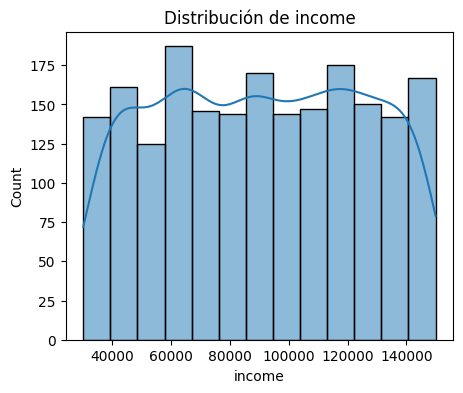

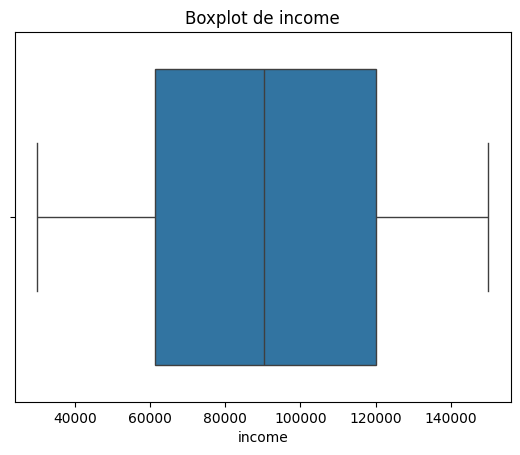

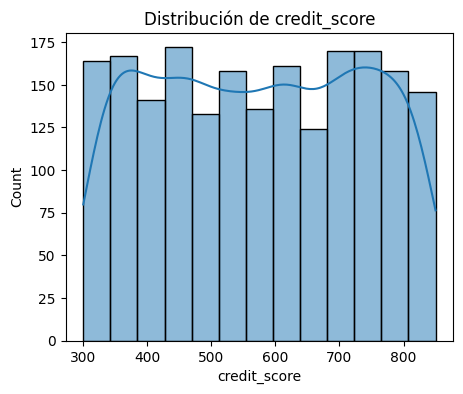

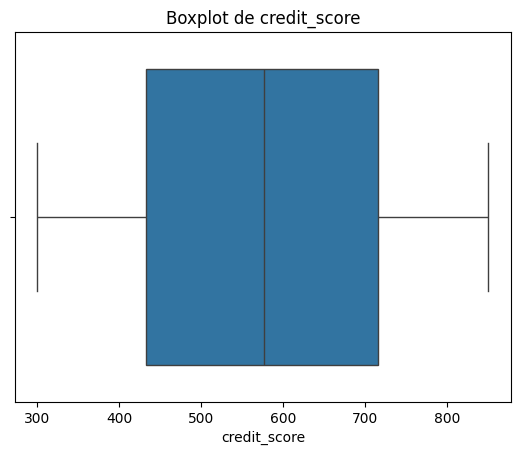

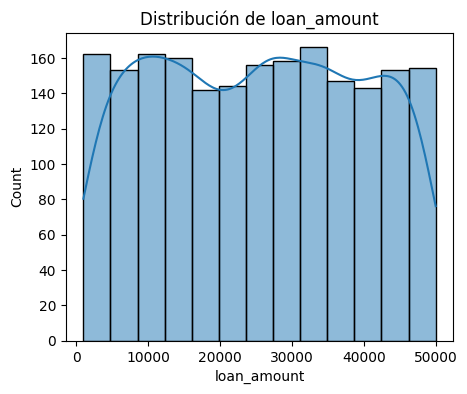

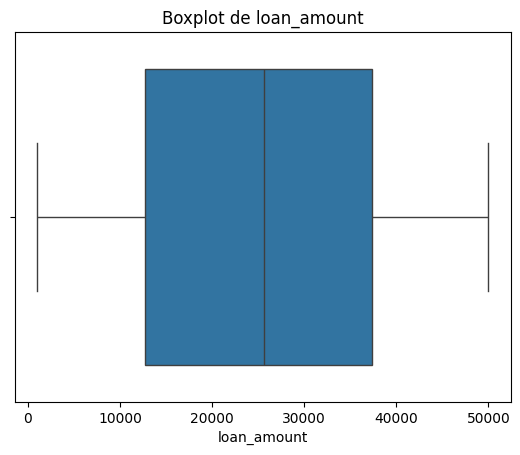

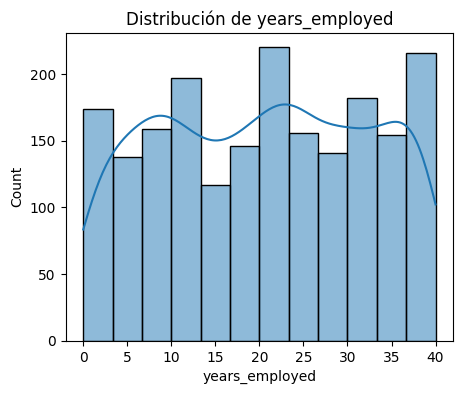

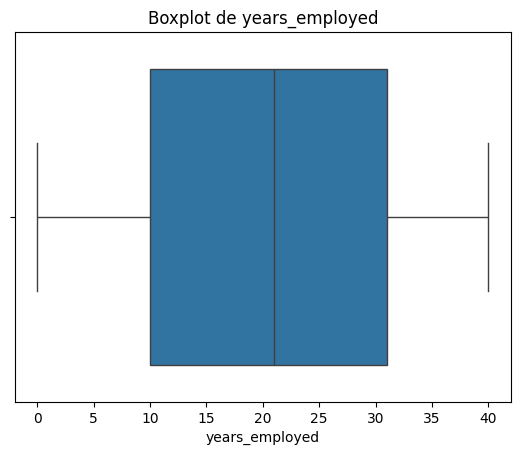

In [85]:
display(df_features[num_cols].describe().T)

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df_features[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

    sns.boxplot(x=df_features[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


In [86]:
for col in cat_cols_useful:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df_features, x=col)
    plt.title(f"Frecuencia de {col}")
    plt.xticks(rotation=45)
    plt.show()


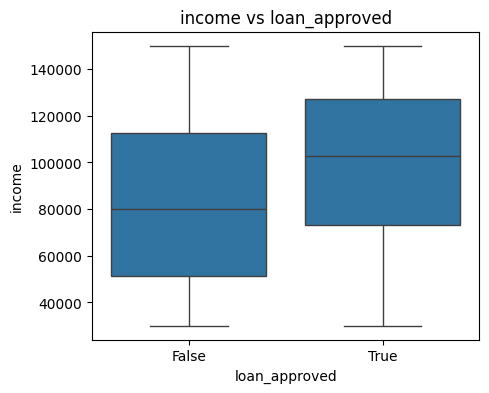

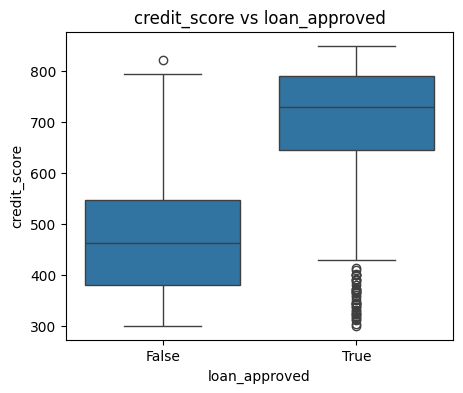

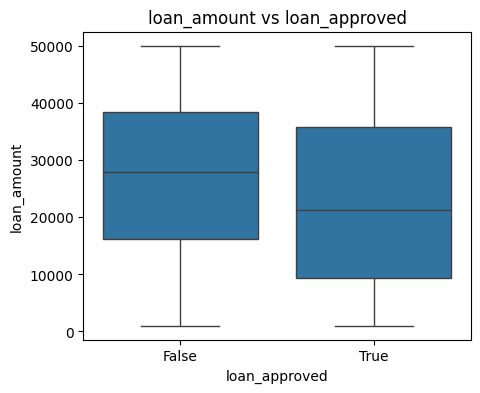

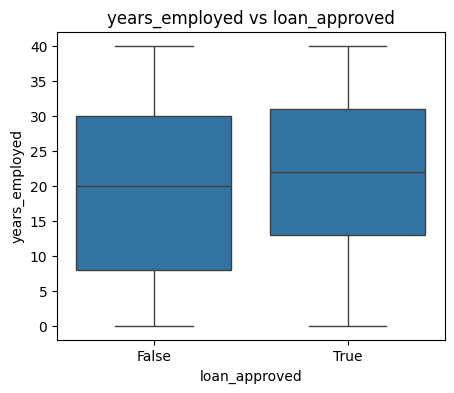

In [87]:
# ===============================
# 🔹 Análisis bivariado con el target separado
# ===============================

# Combinamos momentáneamente para graficar (sin alterar df_features)
df_temp = df_features.copy()
df_temp[target_name] = y

# Numéricas vs Target
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_temp, x=target_name, y=col)
    plt.title(f"{col} vs {target_name}")
    plt.show()

# Categóricas vs Target (solo las útiles)
for col in cat_cols_useful:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df_temp, x=col, hue=target_name)
    plt.title(f"{col} vs {target_name}")
    plt.xticks(rotation=45)
    plt.show()


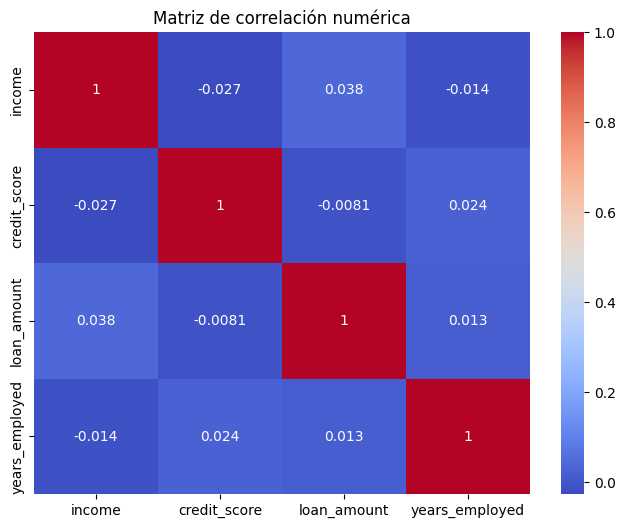

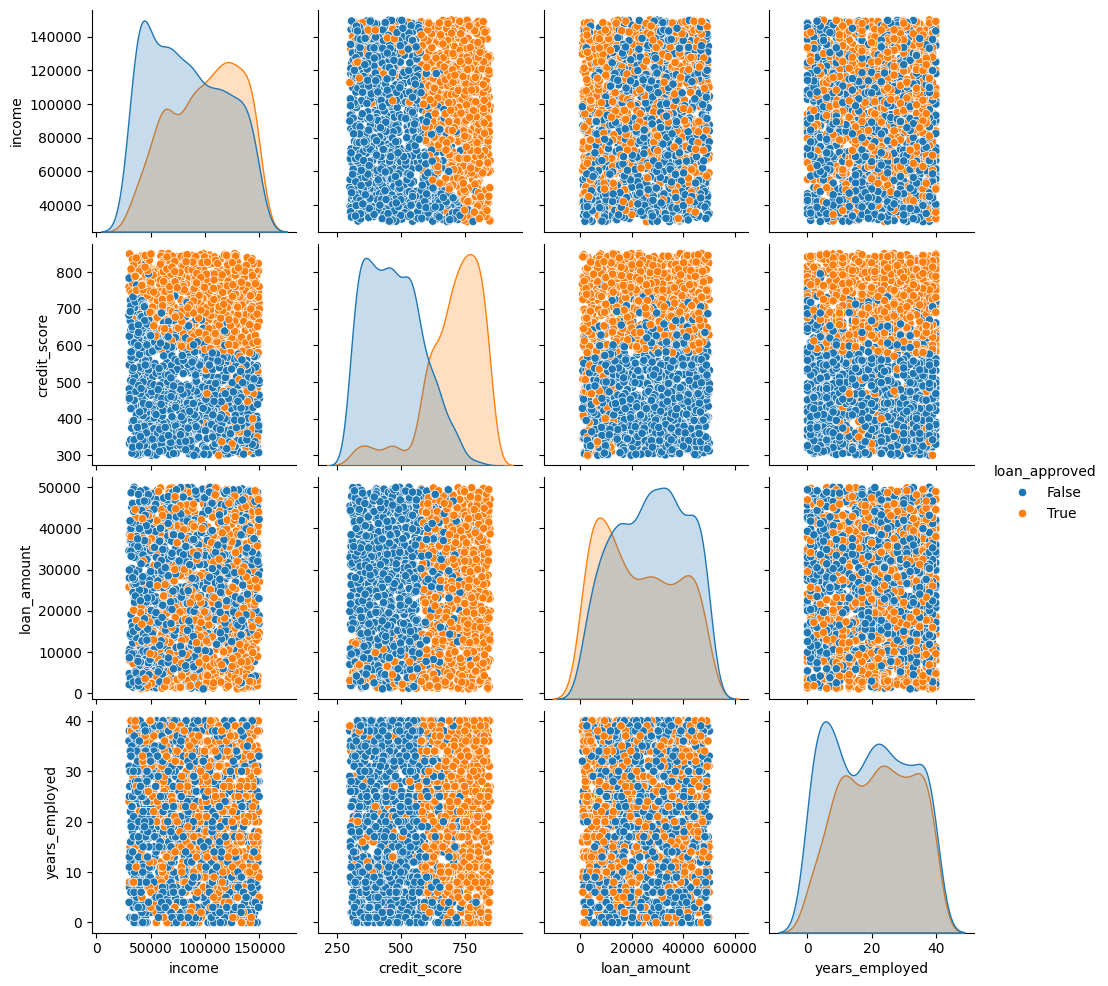

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(df_temp[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación numérica")
plt.show()

sns.pairplot(df_temp[num_cols + [target_name]], hue=target_name)
plt.show()


In [89]:
# ===============================
# 🔹 Guardar datasets para etapas siguientes
# ===============================
df_features.to_csv('../data/Base_de_datos_sin_target.csv', index=False)
y.to_csv('../data/Target_loan_approved.csv', index=False)

print("Archivos exportados correctamente:")
print(" - Base_de_datos_sin_target.csv")
print(" - Target_loan_approved.csv")


Archivos exportados correctamente:
 - Base_de_datos_sin_target.csv
 - Target_loan_approved.csv


In [90]:
import pandas as pd

X = pd.read_csv('../data/Base_de_datos_sin_target.csv')
y = pd.read_csv('../data/Target_loan_approved.csv')

print("Columnas X:", X.columns.tolist())
print("Columnas y:", y.columns.tolist())
print("Distribución del target:")
print(y.value_counts(normalize=True))


Columnas X: ['income', 'credit_score', 'loan_amount', 'years_employed']
Columnas y: ['loan_approved']
Distribución del target:
loan_approved
False            0.5605
True             0.4395
Name: proportion, dtype: float64
